<a href="https://colab.research.google.com/github/vennelakantekar/CodSoft_IRIS_FLOWER_CLASSIFICATION/blob/main/Iris_Dataset_Analysis_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [7]:
iris = pd.read_csv("IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
print("the dataset has {} rows and {} features".format(iris.shape[0],iris.shape[1]))


the dataset has 150 rows and 5 features


In [10]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


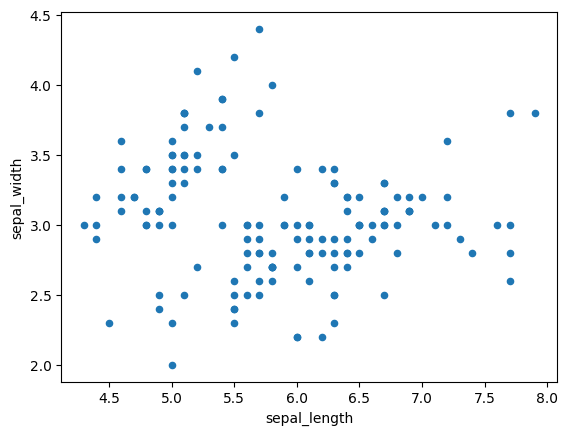

In [12]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

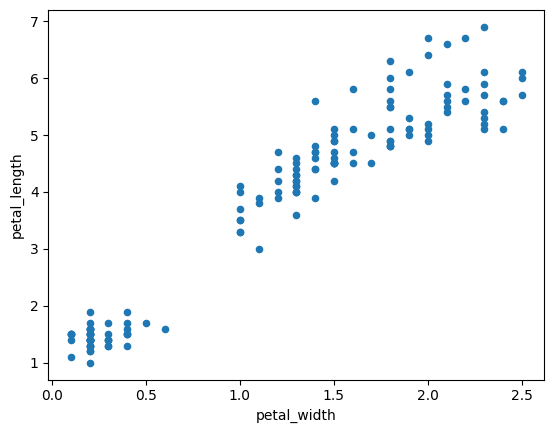

In [13]:
iris.plot(kind='scatter', y='petal_length', x='petal_width') ;
plt.show()

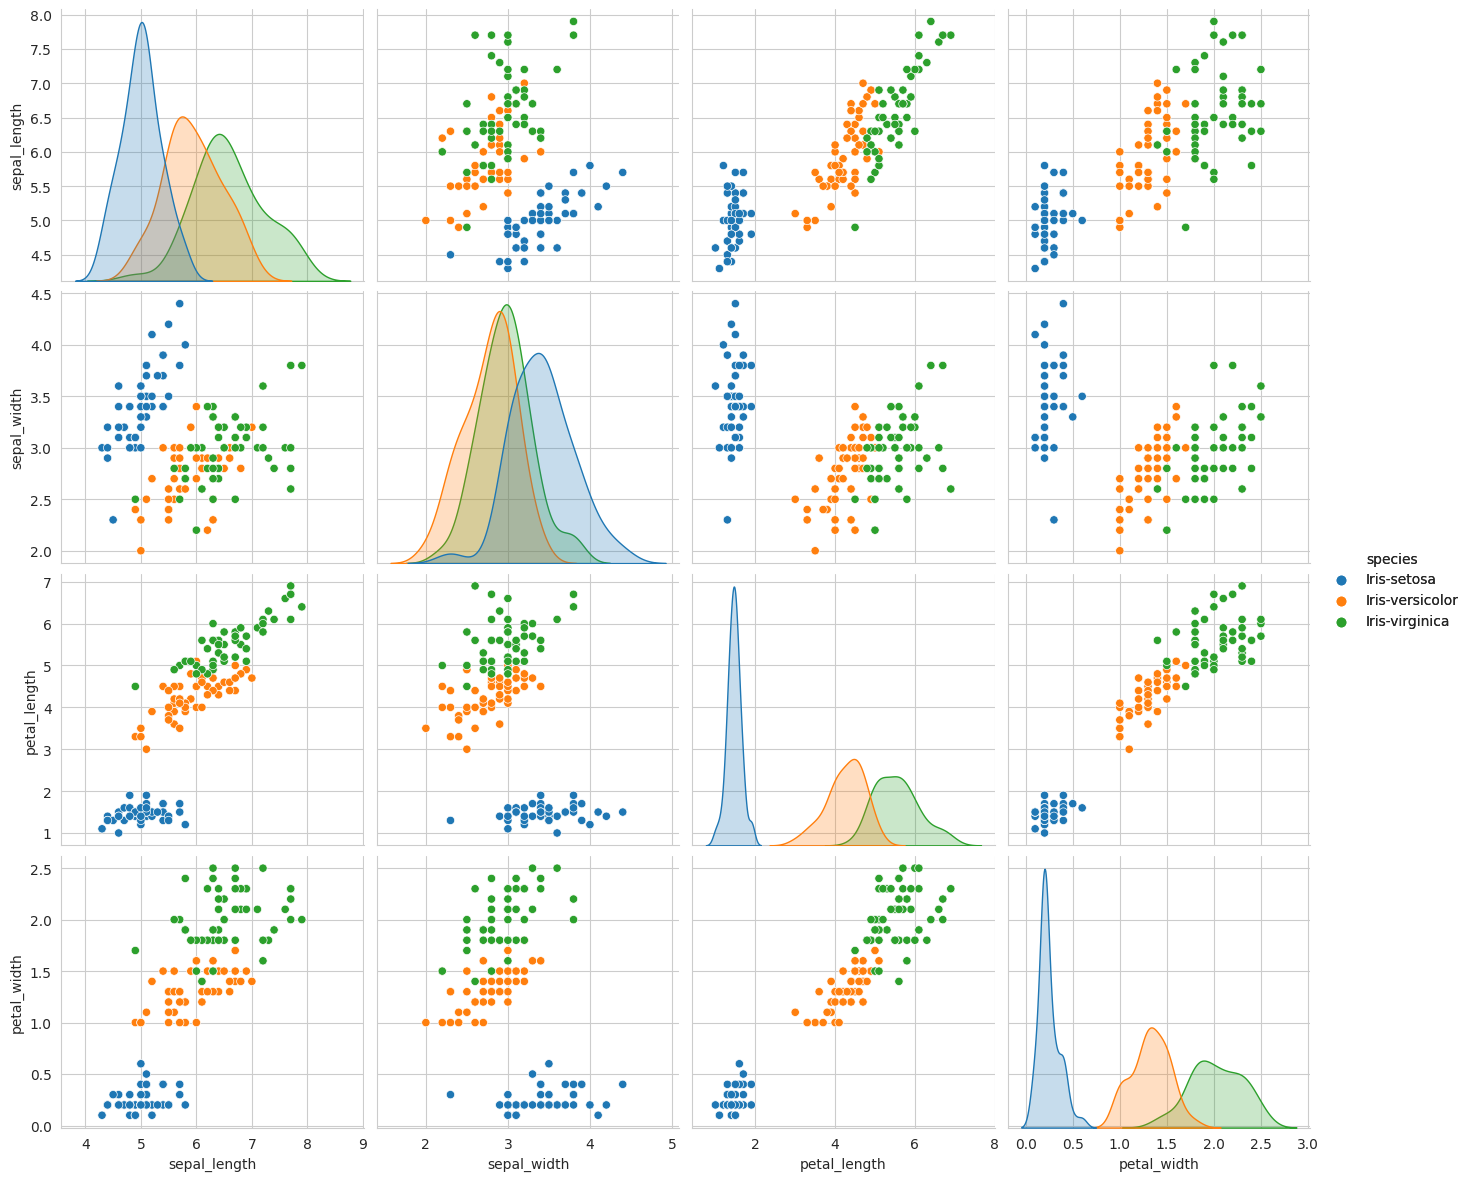

In [20]:
sns.set_style("whitegrid")
sns.pairplot(data=iris,hue="species",size=3)\
   .add_legend()
plt.show()

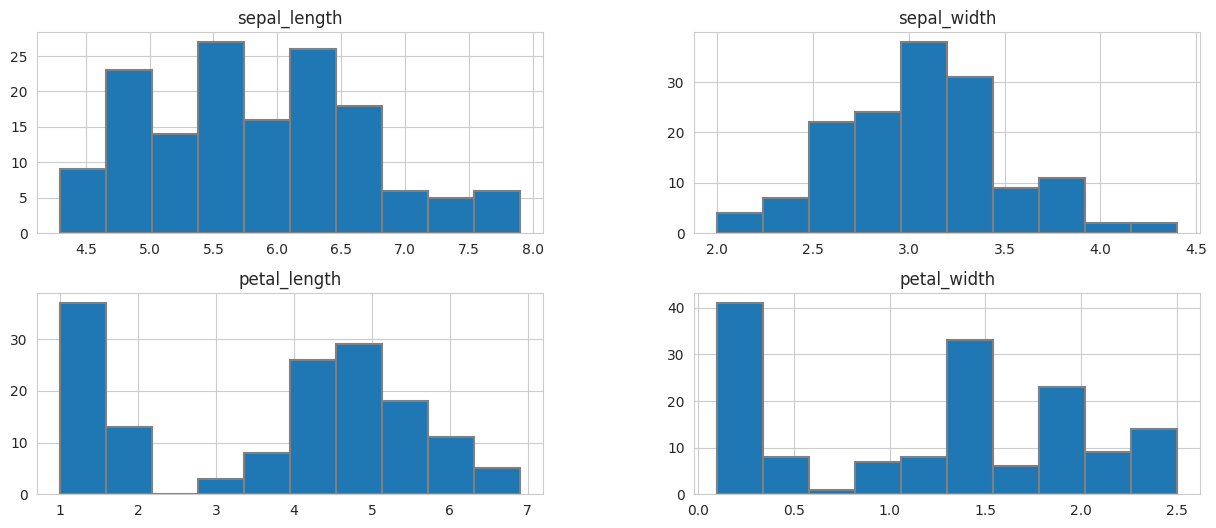

In [23]:
iris.hist(edgecolor='grey', linewidth=1.5)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

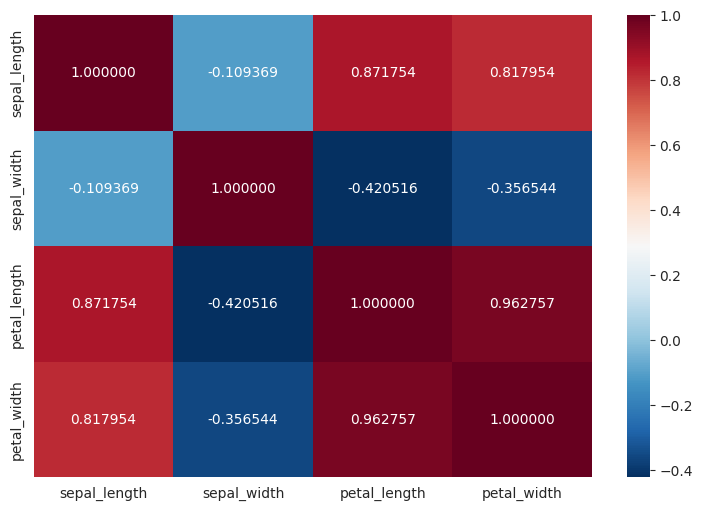

In [29]:
plt.figure(figsize=(9,6))
sns.heatmap(iris.corr(),annot=True,fmt="f",cmap="RdBu_r")
plt.show()

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
[0.12 0.   0.56 0.14 0.   0.   0.14 0.   0.02 0.02]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]
[0.12 0.12 0.68 0.82 0.82 0.82 0.96 0.96 0.98 1.  ]


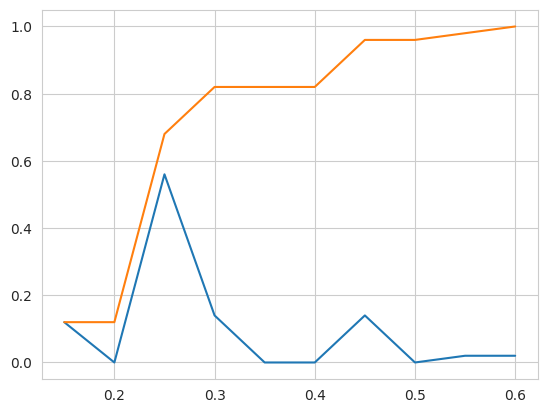

In [30]:
iris_setosa = iris[iris['species']=='Iris-setosa']
print(iris_setosa.head())
counts, bin_edges= np.histogram(iris_setosa['petal_width'],bins=10, density= True)
pdf=counts/(sum(counts))
print(pdf)

print(bin_edges)

cdf=np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

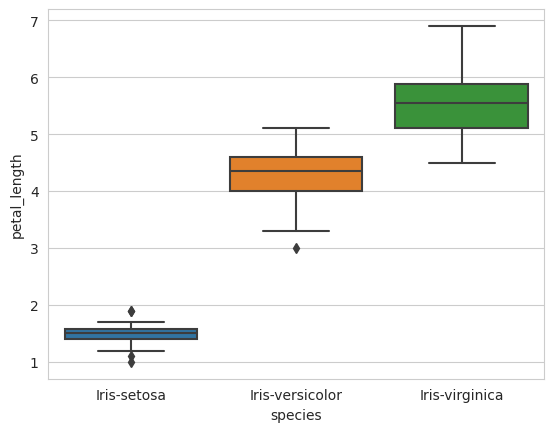

In [31]:
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

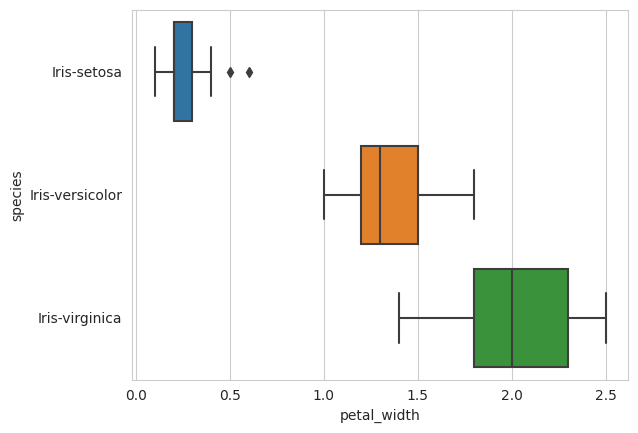

In [33]:
sns.boxplot(y='species',x='petal_width', data=iris)
plt.show()

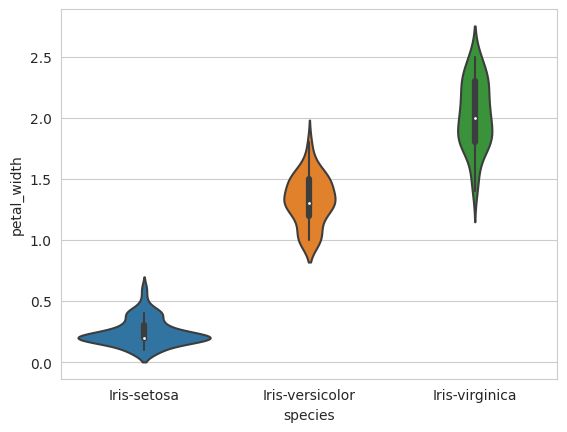

In [34]:
sns.violinplot(x="species", y="petal_width", data=iris, size=8)
plt.show()